In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)

In [8]:
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

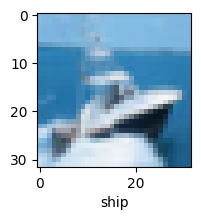

In [12]:
plot_sample(X_train, y_train, 8)

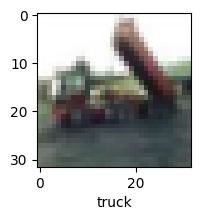

In [13]:
plot_sample(X_train, y_train, 2)

Normalizing the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 53ms/step - loss: 1.4668 - accuracy: 0.4752
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0982 - accuracy: 0.6156
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9791 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9051 - accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8354 - accuracy: 0.7108
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7787 - accuracy: 0.7289
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7257 - accuracy: 0.7480
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6830 - accuracy: 0.7610
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6392 - accuracy: 0.7794
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9711 - accuracy: 0.6901


[0.9710887670516968, 0.6901000142097473]

In [19]:

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[2.0146589e-03, 4.5876805e-04, 7.1812924e-03, 8.8418978e-01,
        5.1785270e-03, 5.5103403e-02, 8.0905657e-04, 5.5163080e-04,
        3.8592096e-02, 5.9207086e-03],
       [4.2071128e-03, 3.5550810e-02, 5.0812531e-07, 1.5187666e-08,
        1.2086419e-06, 1.8875432e-10, 5.4393423e-10, 2.0270265e-08,
        9.5925099e-01, 9.8921824e-04],
       [1.3851705e-02, 4.4480708e-01, 1.2315765e-04, 8.6767378e-04,
        1.8494554e-04, 3.1658681e-05, 1.6356088e-04, 5.6933782e-06,
        4.9632087e-01, 4.3643478e-02],
       [5.4462332e-01, 2.2524556e-03, 2.4170239e-02, 1.2552194e-04,
        7.2696642e-03, 4.5604850e-07, 7.0669892e-05, 4.2889069e-06,
        4.2111647e-01, 3.6692439e-04],
       [1.3570807e-05, 8.7998109e-05, 2.2544412e-02, 5.7697885e-02,
        1.2344124e-01, 1.6210569e-03, 7.9457980e-01, 2.5072366e-06,
        1.0794165e-05, 6.3098884e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [22]:
classes[y_classes[3]]

'airplane'